### Question 1

In [1]:
!git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 819 (delta 411), reused 405 (delta 405), pack-reused 382 (from 1)
Receiving objects: 100% (819/819), 1.05 MiB | 3.33 MiB/s, done.
Resolving deltas: 100% (552/552), done.


In [2]:
%cd pytorch-ssd

/content/pytorch-ssd


In [3]:
!wget -O models/voc-model-labels.txt "https://drive.google.com/uc?export=download&id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc"

--2025-05-14 23:09:46--  https://drive.google.com/uc?export=download&id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.102, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc&export=download [following]
--2025-05-14 23:09:46--  https://drive.usercontent.google.com/download?id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [application/octet-stream]
Saving to: ‘models/voc-model-labels.txt’

models/voc-model-la 100%[===================>]     145  --.-KB/s

In [4]:
!wget -P data http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2025-05-14 23:09:50--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘data/VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================>] 430.13M  25.2MB/s    in 19s     

2025-05-14 23:10:10 (22.8 MB/s) - ‘data/VOCtest_06-Nov-2007.tar’ saved [451020800/451020800]



In [5]:
!tar -xvf data/VOCtest_06-Nov-2007.tar -C data/

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

In [6]:
# test accuracy of the 20 classes
!pwd

/content/pytorch-ssd


In [8]:
!python eval_ssd.py --net mb1-ssd  --dataset /content/pytorch-ssd/data/VOCdevkit/VOC2007 --trained_model models/mobilenet-v1-ssd-mp-0_675.pth --label_file models/voc-model-labels.txt

Streaming output truncated to the last 5000 lines.
Load Image: 0.001908 seconds.
Inference time:  0.004961967468261719
Prediction: 0.012366 seconds.
process image 3709
Load Image: 0.002762 seconds.
Inference time:  0.005148172378540039
Prediction: 0.053859 seconds.
process image 3710
Load Image: 0.002022 seconds.
Inference time:  0.004955768585205078
Prediction: 0.029467 seconds.
process image 3711
Load Image: 0.002190 seconds.
Inference time:  0.005090951919555664
Prediction: 0.051000 seconds.
process image 3712
Load Image: 0.001826 seconds.
Inference time:  0.005049943923950195
Prediction: 0.028854 seconds.
process image 3713
Load Image: 0.001611 seconds.
Inference time:  0.004912137985229492
Prediction: 0.024016 seconds.
process image 3714
Load Image: 0.001930 seconds.
Inference time:  0.0050814151763916016
Prediction: 0.027632 seconds.
process image 3715
Load Image: 0.000846 seconds.
Inference time:  0.005511760711669922
Prediction: 0.025613 seconds.
process image 3716
Load Image: 

As you can see, the pretrained model achieves an accuracy of approximately 0.68, which is relatively low for image or object recognition tasks. To improve performance, we will now fine-tune the model on our selected dataset.

### Question 2

In [9]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.0 MB/s eta 0:00:00


In [10]:
!python open_images_downloader.py --root ./data/open_images --class_names "Handgun,Shotgun" --num_workers 20

2025-05-14 23:28:33,072 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2025-05-14 23:28:33,256 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2025-05-14 23:28:40,491 - root - Read annotation file ./data/open_images/train-annotations-bbox.csv
2025-05-14 23:28:59,684 - root - train bounding boxes size: 1307
2025-05-14 23:28:59,684 - root - Approximate Image Stats: 
2025-05-14 23:28:59,687 - root - Handgun: 561/990 = 0.57.
2025-05-14 23:28:59,687 - root - Shotgun: 429/990 = 0.43.
2025-05-14 23:28:59,687 - root - Label distribution: 
2025-05-14 23:28:59,687 - root - Handgun: 727/1307 = 0.56.
2025-05-14 23:28:59,687 - root - Shotgun: 580/1307 = 0.44.
2025-05-14 23:28:59,687 - root - Shuffle dataset.
2025-05-14 23:28:59,687 - root - Save train data to ./data/open_images/sub-train-annotations-bbox.csv.
2025-05-14 23:28:59,703 - root - Download https://storage.googleapis.com/openimages/2

In [12]:
!python train_ssd.py --dataset_type open_images --datasets data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 1 --base_net_lr 0.001  --batch_size 5

2025-05-14 23:30:43,282 - root - INFO - Use Cuda.
2025-05-14 23:30:43,282 - root - INFO - Namespace(dataset_type='open_images', datasets=['data/open_images'], validation_dataset=None, balance_data=False, net='mb1-ssd', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.01, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=0.001, extra_layers_lr=None, base_net=None, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', milestones='80,100', t_max=100.0, batch_size=5, num_epochs=1, num_workers=4, validation_epochs=5, debug_steps=100, use_cuda=True, checkpoint_folder='models/')
2025-05-14 23:30:43,283 - root - INFO - Prepare training datasets.
2025-05-14 23:30:43,640 - root - INFO - Dataset Summary:Number of Images: 961
Minimum Number of Images for a Class: -1
Label Distribution:
	Handgun: 727
	Shotgun: 580
2025-05-14 23:30:43,642 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2025-05-14 23:30:43,642 - r

In [13]:
!python eval_ssd.py --dataset_type open_images --net mb1-ssd --dataset data/open_images --trained_model models/mb1-ssd-Epoch-0-Loss-3.6486353874206543.pth --label_file models/open-images-model-labels.txt

/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.07754087448120117 seconds to load the model.
process image 0
Load Image: 0.017662 seconds.
Inference time:  0.35151004791259766
Prediction: 0.380991 seconds.
process image 1
Load Image: 0.007501 seconds.
Inference time:  0.007063388824462891
Prediction: 0.026533 seconds.
process image 2
Load Image: 0.005735 seconds.
Inference time:  0.0068585872650146484
Prediction: 0.033440 seconds.
process image 3
Load Image: 0.008071 seconds.
Inference time:  0.006432533264160156
Prediction: 0.030709 seconds.
process image 4
Load Image: 0.012057 seconds.
Inference time:  0.006880044937133789
Prediction: 0.030449 seconds.
process image 5
Load Image: 0.005835 seconds.
Infere

Above we can see that the precision prior to fine-tuning is about 74% for Handgun images and about 36% for Shotgun images. The average precision across all classes is about 55%, which is not a very high precision for an image recognition task.

Now, we will fine-tune the model by increasing the number of epochs to 100:

In [14]:
!python train_ssd.py --dataset_type open_images --datasets data/open_images --net mb1-ssd --pretrained_ssd /content/pytorch-ssd/models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 100 --base_net_lr 0.001  --batch_size 5

2025-05-14 23:45:53,790 - root - INFO - Use Cuda.
2025-05-14 23:45:53,790 - root - INFO - Namespace(dataset_type='open_images', datasets=['data/open_images'], validation_dataset=None, balance_data=False, net='mb1-ssd', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.01, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=0.001, extra_layers_lr=None, base_net=None, pretrained_ssd='/content/pytorch-ssd/models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', milestones='80,100', t_max=100.0, batch_size=5, num_epochs=100, num_workers=4, validation_epochs=5, debug_steps=100, use_cuda=True, checkpoint_folder='models/')
2025-05-14 23:45:53,791 - root - INFO - Prepare training datasets.
2025-05-14 23:45:54,165 - root - INFO - Dataset Summary:Number of Images: 961
Minimum Number of Images for a Class: -1
Label Distribution:
	Handgun: 727
	Shotgun: 580
2025-05-14 23:45:54,167 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2025

In [15]:
!python eval_ssd.py --dataset_type open_images --net mb1-ssd --dataset data/open_images --trained_model models/mb1-ssd-Epoch-99-Loss-2.838987603187561.pth      --label_file models/open-images-model-labels.txt

/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.06976318359375 seconds to load the model.
process image 0
Load Image: 0.011878 seconds.
Inference time:  0.26229166984558105
Prediction: 0.266232 seconds.
process image 1
Load Image: 0.005437 seconds.
Inference time:  0.005884885787963867
Prediction: 0.021179 seconds.
process image 2
Load Image: 0.004520 seconds.
Inference time:  0.0051572322845458984
Prediction: 0.015619 seconds.
process image 3
Load Image: 0.005857 seconds.
Inference time:  0.004734516143798828
Prediction: 0.010401 seconds.
process image 4
Load Image: 0.007462 seconds.
Inference time:  0.00484776496887207
Prediction: 0.012411 seconds.
process image 5
Load Image: 0.003894 seconds.
Inference 

Before fine-tuning, the model achieved an average precision of 0.737 for the Handgun class and 0.359 for the Shotgun class, resulting in an overall average precision across both classes of 0.548. These results suggest that the model performed moderately well for Handgun detection but struggled with Shotgun detection, indicating the need for additional training.

After fine-tuning the model over 100 epochs, performance improved across both categories. The precision for the Handgun class increased to 0.797, while the Shotgun class improved to 0.494, reflecting a meaningful improvement in the model's detection accuracy, especially for the under-performing class. The overall average precision across all classes rose to 0.645, which shows a modest improvement in overall detection accuracy.

### Question 3

In [16]:
!pip install onnx onnxruntime netron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.7 MB/s eta 0:00:00


In [18]:
!pwd

/content/pytorch-ssd


In [19]:
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
import torch.onnx
import onnx
import onnxruntime
import numpy as np

In [20]:
model_path = 'models/mb1-ssd-Epoch-99-Loss-2.838987603187561.pth'
label_path = 'models/open-images-model-labels.txt'
class_names = [name.strip() for name in open(label_path).readlines()]

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
net = create_mobilenetv1_ssd(len(class_names), is_test = True)
net.load(model_path)
net.to(device)
net.eval()

SSD(
  (base_net): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1), st

In [23]:
onnx_model_path = 'models/mb1-ssd.onnx'
dummy_input = torch.randn(1, 3, 300, 300, device = device)
torch.onnx.export(net, dummy_input, onnx_model_path, verbose = False, output_names = ['scores', 'boxes'])

### Question 4

In [24]:
onnx_model = onnx.load(onnx_model_path)
onnx.checker.check_model(onnx_model)

### Question 5

In [25]:
ort_session = onnxruntime.InferenceSession(onnx_model_path)

ort_inputs = {ort_session.get_inputs()[0].name: dummy_input.detach().cpu().numpy()}
ort_outs = ort_session.run(None, ort_inputs)

### Question 6

In [26]:
torch_out = net(dummy_input)
torch_out_np = [tensor.detach().cpu() for tensor in torch_out]

In [27]:
np.allclose(torch_out_np[0], ort_outs[0], rtol=1e-03, atol=1e-06)

True

In [28]:
np.allclose(torch_out_np[1], ort_outs[1], rtol=1e-03, atol=1e-06)

True

Yes, the outputs from the PyTorch model (`torch_out`) and the ONNX Runtime model (`ort_outs`) match. I verified this using `np.allclose()` with relative and absolute tolerances set to `1e-03` and `1e-06`, respectively. The function returned `True` for both the `scores` and `boxes` outputs, indicating that the predictions from the ONNX model are consistent with the original PyTorch model's outputs.

This confirms that the model was exported correctly and that ONNX inference is working as expected.

### Question 7

In [29]:
from PIL import Image

In [30]:
def preprocess_image(image_path):
    input_shape = (1, 3, 300, 300)
    img = Image.open(image_path)
    img = img.resize((300, 300), Image.BILINEAR)

    img_data = np.array(img)
    img_data = np.transpose(img_data, [2, 0, 1])
    img_data = np.expand_dims(img_data, 0)

    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[1]):
        norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

    return norm_img_data, img

In [31]:
ort_session = onnxruntime.InferenceSession('models/mb1-ssd.onnx')

In [34]:
image_paths = ['/content/pytorch-ssd/data/open_images/test/1203af37e4dc67ac.jpg',
               '/content/pytorch-ssd/data/open_images/test/1847f2074cc67757.jpg']

In [35]:
for image_path in image_paths:
    img_y, img = preprocess_image(image_path)

    ort_inputs = {ort_session.get_inputs()[0].name: img_y}
    ort_outs = ort_session.run(None, ort_inputs)

    print(ort_outs[0])

[[[9.9954057e-01 2.2341390e-04 2.3607744e-04]
  [9.9918717e-01 5.0804258e-04 3.0479196e-04]
  [9.9932635e-01 2.6503648e-04 4.0864319e-04]
  ...
  [3.7464015e-02 8.0554223e-01 1.5699381e-01]
  [1.0466444e-02 8.5378128e-01 1.3575223e-01]
  [3.5962719e-01 5.1339191e-01 1.2698092e-01]]]
[[[9.5753640e-01 2.3451572e-02 1.9012032e-02]
  [9.7293901e-01 1.1154332e-02 1.5906613e-02]
  [9.6088183e-01 1.9998107e-02 1.9120049e-02]
  ...
  [9.9924397e-01 1.3972471e-04 6.1632035e-04]
  [9.9311405e-01 1.3067296e-03 5.5792043e-03]
  [9.9902678e-01 3.0254252e-04 6.7073747e-04]]]


From the output matrices above, we can see a range of confidence scores across the detected elements in each image. Some rows contain values close to 1.0, indicating that the model is highly confident in its predictions for those detections. In other rows, the scores are more spread out, reflecting uncertainty or lower confidence. This variation shows that the ONNX model is capable of distinguishing between strong and weak detections, and that it was able to process both the handgun and shotgun images successfully. These results confirm that the model is functioning correctly in the ONNX Runtime environment and is making reasonable inferences on unseen test images.

### Question 8 (Bonus)

In [36]:
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [40]:
# this function calculates how much 2 boxes overlap
def iou(boxA, boxB):
    # find the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # calculate the intersection area
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # calculate the area of the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # calculate the intersection over union
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

# this function only keeps boxes without a lot of overlap
def non_max_suppression(boxes, scores, threshold):
    # list of selected indices
    idxs = []

    # make list of the boxes with their scores and indexes
    boxes_with_scores = sorted(zip(boxes, scores, range(len(boxes))), key=lambda x: x[1], reverse=True)

    while len(boxes_with_scores) > 0:
        # select the box with the highest score
        box_to_keep = boxes_with_scores.pop(0)
        idxs.append(box_to_keep[2])

        # loop through all the other boxes and remove boxes that have a lot of overlap with this one
        boxes_with_scores = [box for box in boxes_with_scores if iou(box_to_keep[0], box[0]) < threshold]

    return idxs

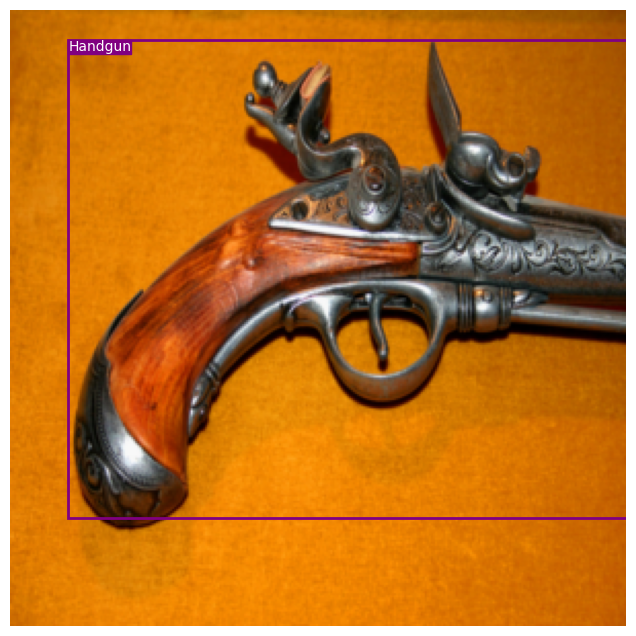

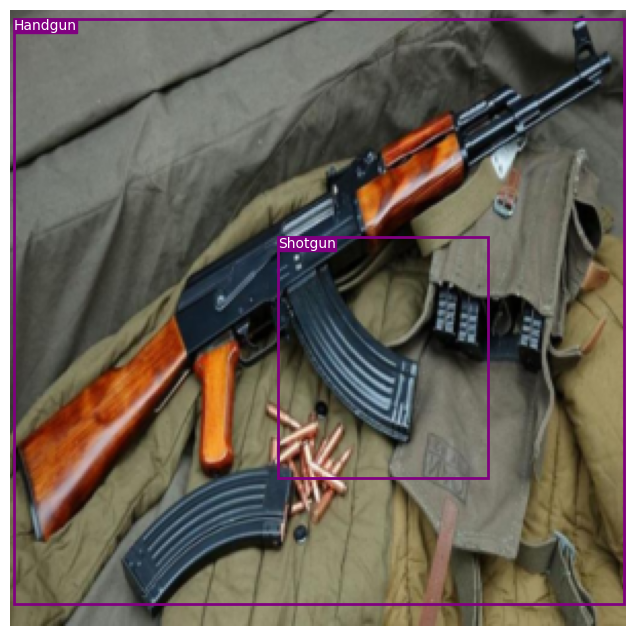

In [56]:
# define the class names
class_names = ["Handgun", "Shotgun"]

# Load the ONNX model with ONNX Runtime
ort_session = ort.InferenceSession("models/mb1-ssd.onnx")

# Load selected test images
image_paths = [
    "/content/pytorch-ssd/data/open_images/test/04abf880fdee279d.jpg",
    "/content/pytorch-ssd/data/open_images/test/0f5eec3235d8a3df.jpg"
]

for image_path in image_paths:
    # this is the same preprocessing function as in the above code
    norm_img_data, original_img = preprocess_image(image_path)

    # inference
    ort_inputs = {ort_session.get_inputs()[0].name: norm_img_data}
    ort_outs = ort_session.run(None, ort_inputs)

    # extracting the bounding boxes, labels, scores
    labels_scores = ort_outs[0][0]
    bboxes = ort_outs[1][0]

    # given that the first index is label and the second index is score
    labels = labels_scores[:, 0]
    scores = labels_scores[:, 1]

    # collect all detections
    all_boxes = []
    all_scores = []
    all_labels = []

    # given that the original image size is the one used in detection
    original_img_width, original_img_height = original_img.size

    # collect all boxes, scores, labels
    for box, label, score in zip(bboxes, labels, scores):
        if score > 0.03:  # I chose a threshold of 0.03 to collect all possible detections
            all_boxes.append(box)
            all_scores.append(score)
            all_labels.append(label)

    # apply Non-Maximum Suppression function above to filter detections
    selected_indices = non_max_suppression(all_boxes, all_scores, threshold=0.3)

    # plotting the image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    ax = plt.gca()

    # looping through the detections after NMS
    for idx in selected_indices:
        box = all_boxes[idx]
        label = all_labels[idx]
        score = all_scores[idx]

        # scale the bounding box back to original image size
        xmin, ymin, xmax, ymax = box
        xmin *= original_img_width
        xmax *= original_img_width
        ymin *= original_img_height
        ymax *= original_img_height

        # calculate width and height of the box
        box_width = xmax - xmin
        box_height = ymax - ymin

        # create the rectangle for the bounding box
        bbox = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='purple', facecolor='none')
        ax.add_patch(bbox)

        # add a label with the class name
        label_text = f"{class_names[round(label)]}"
        plt.text(xmin, ymin, label_text, color='white', verticalalignment='top', bbox={'color': 'purple', 'pad': 0})

    plt.axis('off')
    plt.show()

In the final inference results, the model was able to successfully draw bounding boxes on both test images, labeling the detected objects. In the first image, the model correctly identified the handgun. In the second image, the model initially only labeled the rifle as a "Handgun" at higher thresholds. However, when I slightly lowered the confidence threshold from 0.05 to 0.03, the model also labeled the magazine area as a "Shotgun."

This mixed labeling suggests that the model is more confident in predicting "Handgun" class objects, which aligns with what we observed during evaluation: the precision for the "Handgun" class was significantly higher than for "Shotgun" even after fine-tuning. That may explain why the model tends to default to labeling weapons as "Handgun," even when the object is closer to a "Shotgun" in appearance.

Although not perfect, the model is functioning reasonably well and does detect both classes when a more lenient threshold is used.